# Analyzing Housing and Development Board (HDB) datasets

## Details
Name: Reuben Goh  
Adm Num: P2205711  
Class: EP0302 04

## URLs of Datasets Chosen
1. [HDB Property Information](https://beta.data.gov.sg/datasets/d_17f5382f26140b1fdae0ba2ef6239d2f/view)
2. [Housing And Development Board Resale Price Index (1Q2009 = 100), Quarterly](https://beta.data.gov.sg/datasets/d_14f63e595975691e7c24a27ae4c07c79/view)
3. [Resale Flat Prices](https://beta.data.gov.sg/collections/189/view) (used all datasets in this collection to obtain data from 1990-2024)

# NOTES (to be deleted at the end)

must have missing value analysis

Urban Planning:

    High-density towns may require more resources and infrastructure development.
    Towns with lower densities could be targeted for future housing projects.

Market Trends:

    Historical trends in resale prices can inform investment strategies and policy decisions.
    Significant price shifts may indicate market cycles or impacts of policy changes.

Housing Preferences:

    Understanding the distribution of flat types can guide future construction projects to match demand.
    Policies can be tailored to ensure a balanced supply of different flat types.

Property Value:

    Insights into how property age affects value can assist buyers and investors in making informed decisions.
    Highlighting outliers in resale prices can identify opportunities or risks in the market.

Investment Strategies:

    Detailed resale price distributions by flat type can help buyers and sellers understand market expectations.
    Identifying trends in resale prices can guide strategic investment in specific flat types.

In [2]:
# Imports and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

dataset_path = "./datasets"

### Dataset 1 (HDB Property Information):

In [3]:
try:
  property_info = pd.read_csv(os.path.join(dataset_path, "HDBPropertyInformation.csv"))

  print(f"Shape of dataset:\n{property_info.shape}\n")
  print(f"Index of dataset:\n{property_info.index}\n")
  print(f"List of columns:\n{property_info.columns}\n")
  print(f"Total number of non-NA values in dataset:\n{property_info.count()}\n")

  # summary
  print("Dataset summary:")
  print(property_info.info())

  # descriptive statistics
  print("Descriptive statistics:")
  print(property_info.describe())

except Exception as e:
  print("Error while reading dataset:")
  print(e)


Shape of dataset:
(12877, 24)

Index of dataset:
RangeIndex(start=0, stop=12877, step=1)

List of columns:
Index(['blk_no', 'street', 'max_floor_lvl', 'year_completed', 'residential',
       'commercial', 'market_hawker', 'miscellaneous', 'multistorey_carpark',
       'precinct_pavilion', 'bldg_contract_town', 'total_dwelling_units',
       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',
       'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental',
       '2room_rental', '3room_rental', 'other_room_rental'],
      dtype='object')

Total number of non-NA values in dataset:
blk_no                   12877
street                   12877
max_floor_lvl            12877
year_completed           12877
residential              12877
commercial               12877
market_hawker            12877
miscellaneous            12877
multistorey_carpark      12877
precinct_pavilion        12877
bldg_contract_town       12877
total_dwelling_units     12877
1room_sold 

### Dataset 2 (Housing and Development Board Resale Price Index):

In [4]:
try:
  resale_price_index = pd.read_csv(os.path.join(dataset_path, "HousingAndDevelopmentBoardResalePriceIndex1Q2009100Quarterly.csv"))
  
  # combine the 'quarter' column to 'year' 


  resale_price_index['quarter'] = pd.to_datetime(resale_price_index['quarter'], format='mixed')
  resale_price_index_yearly = resale_price_index.resample('Y', on='quarter')['index'].mean()
  resale_price_index_yearly = resale_price_index_yearly.reset_index()
  
  # Rename the 'quarter' column to 'year'
  resale_price_index_yearly.rename(columns={'quarter': 'year'}, inplace=True)
  
  # print(resale_price_index_yearly)


  print(f"Shape of dataset:\n{resale_price_index_yearly.shape}\n")
  print(f"Index of dataset:\n{resale_price_index_yearly.index}\n")
  print(f"List of columns:\n{resale_price_index_yearly.columns}\n")
  print(f"Total number of non-NA values in dataset:\n{resale_price_index_yearly.count()}\n")

  # summary
  print("Dataset summary:")
  print(resale_price_index_yearly.info())

  # descriptive statistics
  print("Descriptive statistics:")
  print(resale_price_index_yearly.describe())

except Exception as e:
  print("Error while reading dataset:")
  print(e)

Shape of dataset:
(35, 2)

Index of dataset:
RangeIndex(start=0, stop=35, step=1)

List of columns:
Index(['year', 'index'], dtype='object')

Total number of non-NA values in dataset:
year     35
index    35
dtype: int64

Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    35 non-null     datetime64[ns]
 1   index   35 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 692.0 bytes
None
Descriptive statistics:
                                year       index
count                             35   35.000000
mean   2007-12-31 08:54:51.428571392  100.885714
min              1990-12-31 00:00:00   24.600000
25%              1999-07-01 12:00:00   73.737500
50%              2007-12-31 00:00:00   94.425000
75%              2016-07-01 00:00:00  134.262500
max              2024-12-31 00:00:00  183.70000

C:\Users\reube\AppData\Local\Temp\ipykernel_27084\3963668261.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  resale_price_index_yearly = resale_price_index.resample('Y', on='quarter')['index'].mean()


### Dataset 3 (Resale Flat Prices):

In [5]:
try:
  resale_price_1999 = pd.read_csv(os.path.join(dataset_path, "ResaleFlatPricesBasedonApprovalDate19901999.csv"))
  resale_price_2000 = pd.read_csv(os.path.join(dataset_path, "ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv"))
  resale_price_2012 = pd.read_csv(os.path.join(dataset_path, "ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv"))
  resale_price_2017 = pd.read_csv(os.path.join(dataset_path, "ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv"))

  # remove "remaining_lease" from resale_price_2017
  resale_price_2017 = resale_price_2017.drop("remaining_lease", axis=1)

  # combine all 4 datasets
  resale_price = pd.concat([resale_price_1999, resale_price_2000, resale_price_2012, resale_price_2017])
  # print(resale_price)

  print(f"Shape of dataset:\n{resale_price.shape}\n")
  print(f"Index of dataset:\n{resale_price.index}\n")
  print(f"List of columns:\n{resale_price.columns}\n")
  print(f"Total number of non-NA values in dataset:\n{resale_price.count()}\n")

  # summary
  print("Dataset summary:")
  print(resale_price.info())

  # descriptive statistics
  print("Descriptive statistics:")
  print(resale_price.describe())

except Exception as e:
  print("Error while reading dataset:")
  print(e)

Shape of dataset:
(894700, 10)

Index of dataset:
Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       185640, 185641, 185642, 185643, 185644, 185645, 185646, 185647, 185648,
       185649],
      dtype='int64', length=894700)

List of columns:
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

Total number of non-NA values in dataset:
month                  894700
town                   894700
flat_type              894700
block                  894700
street_name            894700
storey_range           894700
floor_area_sqm         894700
flat_model             894700
lease_commence_date    894700
resale_price           894700
dtype: int64

Dataset summary:
<class 'pandas.core.frame.DataFrame'>
Index: 894700 entries, 0 to 185649
Data columns (total 10 columns):
 #   Column               Non-Null Cou

#### Merging Dataset

In [6]:
merged_data = pd.merge(resale_price, property_info, how="left", left_on=["block", "street_name"], right_on=["blk_no", "street"])
# print(merged_data)

### Urban Planning (Bar Graph)

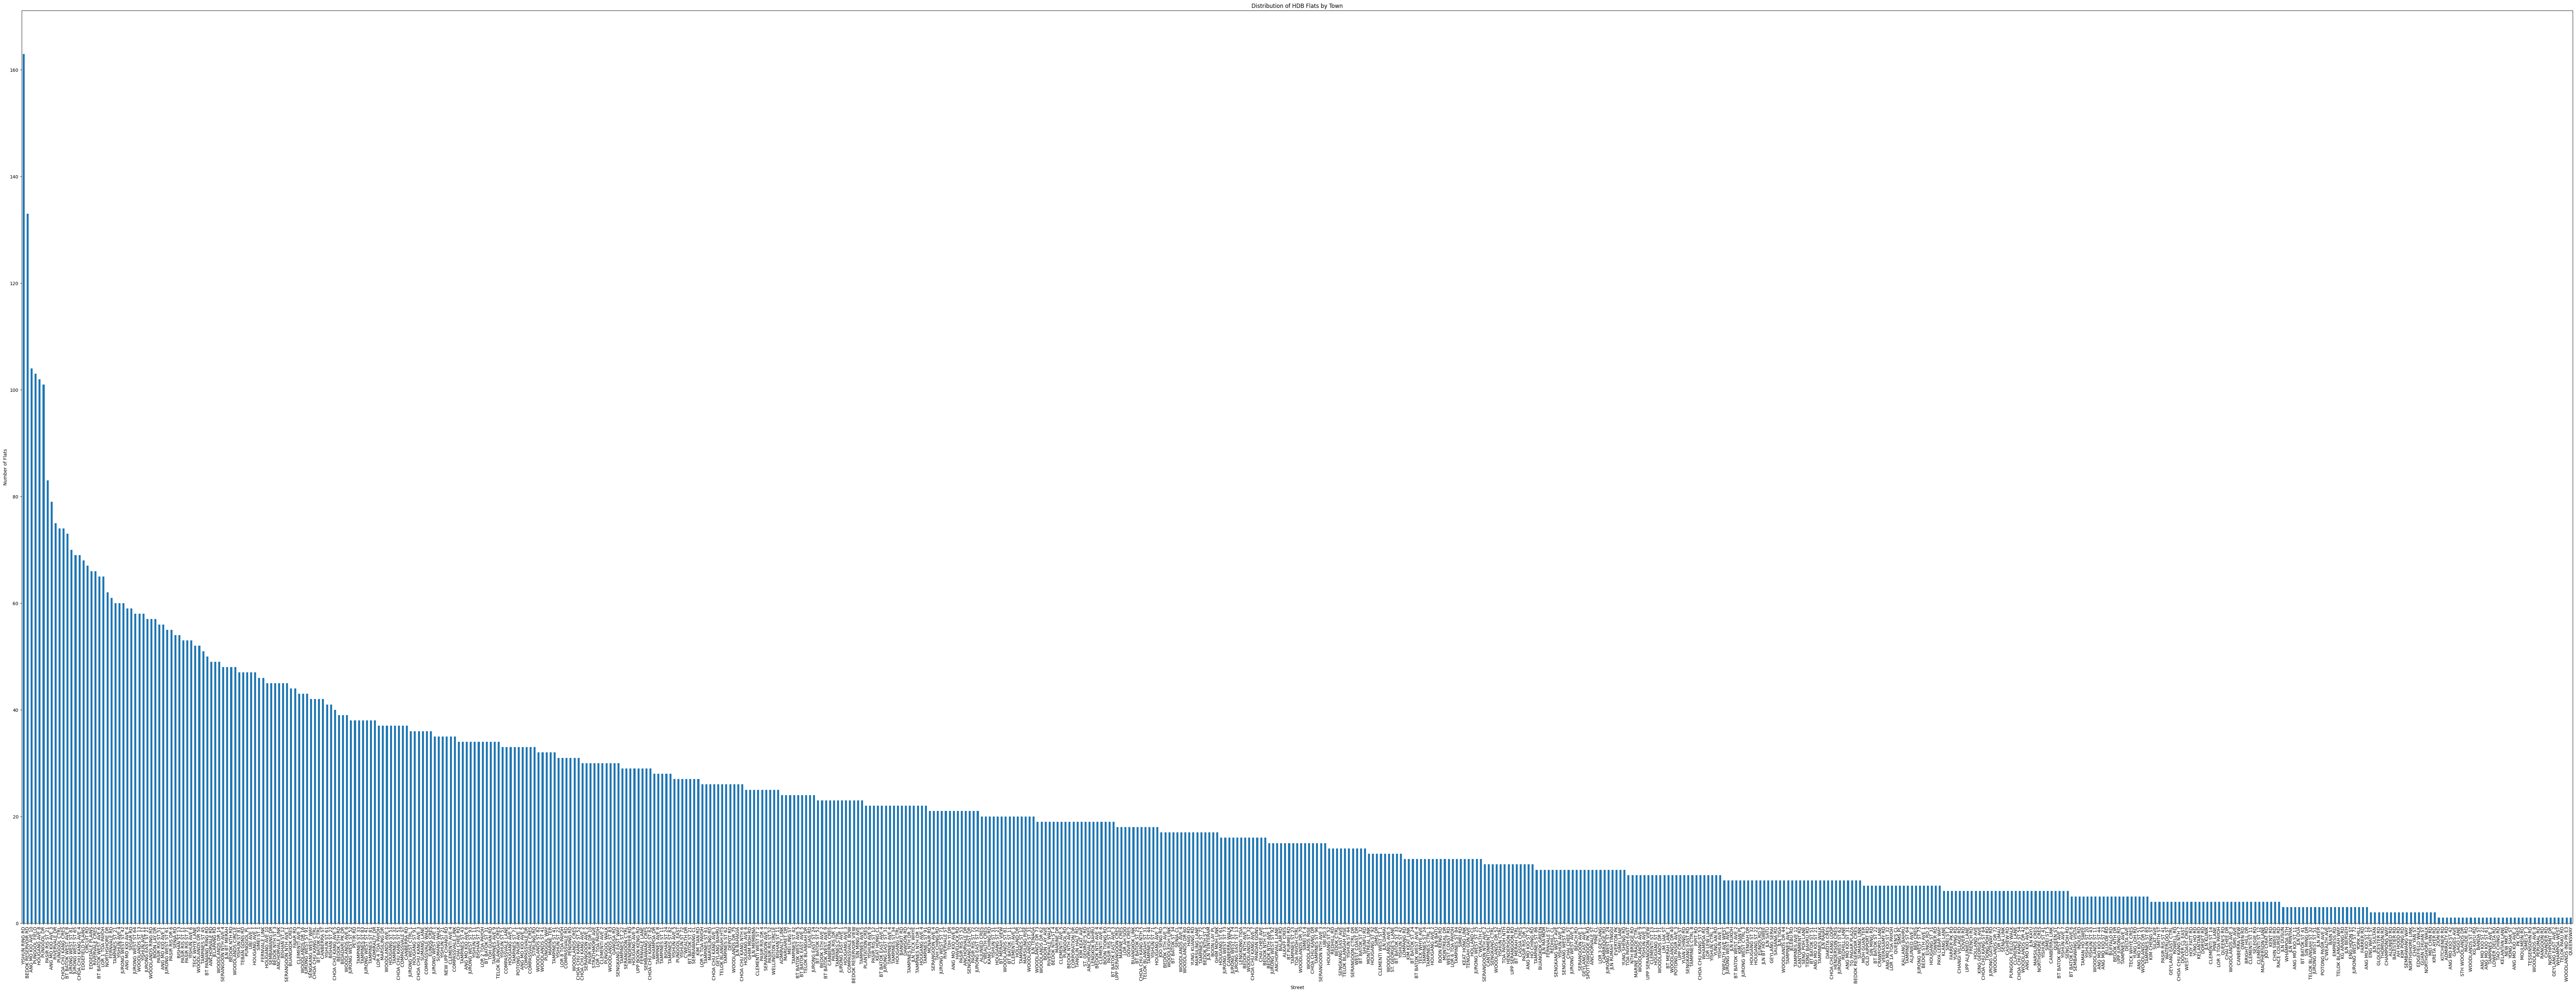

In [7]:
# Bar Graph

plt.figure(figsize=(100, 36))
property_info["street"].value_counts().plot(kind="bar")
plt.title("Distribution of HDB Flats by Town")
plt.xlabel("Street")
plt.ylabel("Number of Flats")
plt.show()


#### Analysis of Bar Graph

    With a bar graph, we are able to see the distribution of HDB Flats by  
    the locations in Singapore.

Resources and Infrastructure Development:  

    From this bar Graph, we can identify which locations have a high density  
    of people and which has a low density of people. Based on the bar graph,  
    Yishun Ring Road has the highest number of flats in the area. This would  
    mean that Yishun Ring Road has the highest density of people living in  
    Yishun Ring Road. Hence we more resources and infrastructure developments  
    should be dedicated to this area.
    
    On the other hand, areas like Queensway and Woodlands IND PK E3 has the  
    lowest number of flats in the area, meaning that there is the least density  
    of people living in Queensway and Woodlands IND PK E3. Thus, these areas  
    can be targeted for future housing projects.

### Market Trends (Line Graph)

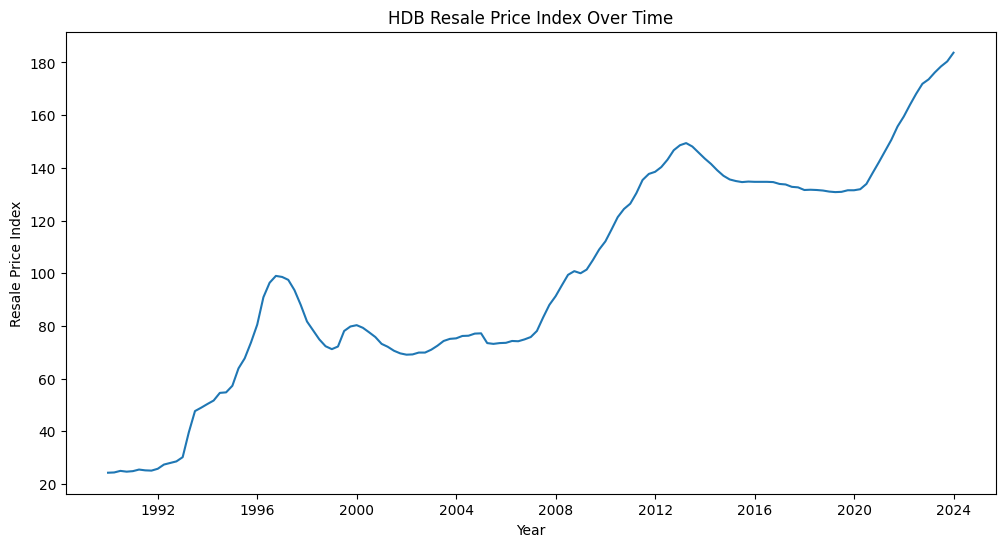

In [8]:
# Line Graph

plt.figure(figsize=(12, 6))

plt.plot(resale_price_index["quarter"], resale_price_index["index"])
plt.title("HDB Resale Price Index Over Time")
plt.xlabel("Year")
plt.ylabel("Resale Price Index")
plt.show()

#### Analysis of Line Graph

    With a line graph, we are able to see how the resale price index changes  
    over time and observe the trends

Market Trend:

    With this line graph, we are able to see the market trend of HDB resale  
    prices over the years from 1990 all the way to 2024. Some notable spikes  
    includes 2020 to 2024, there is a noticable spike and constant increase  
    in resale price index. This may be due to the Covid-19 pandemic where  
    there was an ease in restrictions to resale transaction policies which  
    led to a surge in transactions and prices. Other factors which led to  
    an increase in resale price index includes government policies like  
    housing grants. Changes in the Central Provident Fund (CPF) Housing  
    Grants with increased grant amounts reduced the effective cost of  
    resale flats, hence boosting demand and prices.

### Housing Preferences (Pie Chart)

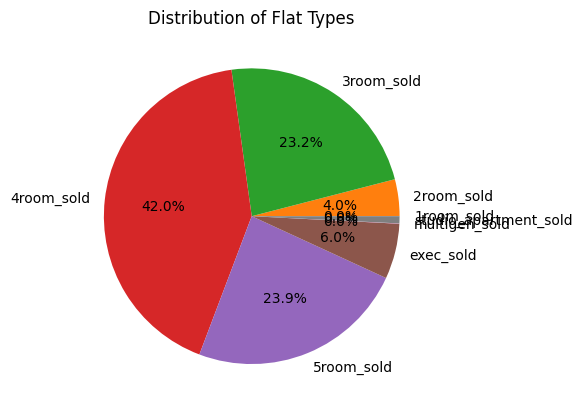

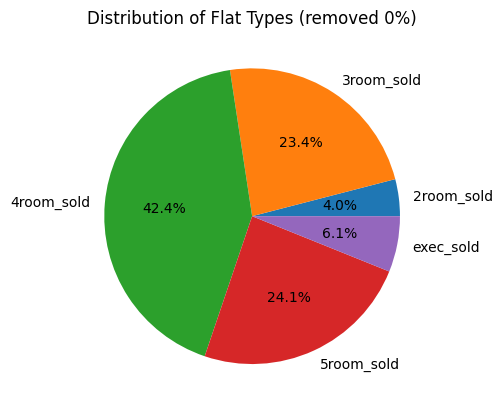

In [9]:
# Pie Chart

flat_types = ["1room_sold", "2room_sold", "3room_sold", "4room_sold", "5room_sold", "exec_sold", "multigen_sold", "studio_apartment_sold"]
flat_type_counts = property_info[flat_types].sum()
flat_type_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Flat Types")
plt.show()

flat_types = ["2room_sold", "3room_sold", "4room_sold", "5room_sold", "exec_sold"]
flat_type_counts = property_info[flat_types].sum()
flat_type_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Flat Types (removed 0%)")
plt.show()

#### Analysis of Pie Chart

    With a pie chart, we can see the distribution of different flat types  
    and visualize the proportion of different flat types.

Housing Preferences:

    With a Pie chart, we are able to analyze the proportion of different  
    flat types and the preferences people have. Based on the chart, we  
    can see that 4 rooms flats are the most sold followed by 5 room flats.  
    This could be due to small 4 room flats being considered "ideal" for  
    small families and young couples planning to have children as they  
    offer enough space for essential rooms like a nursery, children's  
    bedroom, main bedroom, and possibly a home office.

    Next, 5 room flats offer larger living and dining areas, making them  
    suitable for larger families or those who prefer more spacious living  
    environments. The additional space in 5 room flats also provides more  
    options for customization and use of rooms, such as creating a home  
    office, study area, or additional bedrooms.

    In general, with the scarcity of prime real estate and the growing  
    wealth of residents in Singapore, valuation and demand for these flat  
    types increases as people are able to afford them. Furthermore with  
    housing grants and policies aimed at making homeownership more  
    accessible, the demand for these flats are boosted. And with enhanced  
    housing grants on top of other incentives, it is easier for families  
    to afford 4 room and 5 room flats, thereby increasing their popularity.

### Property Value (Scatter Plot)

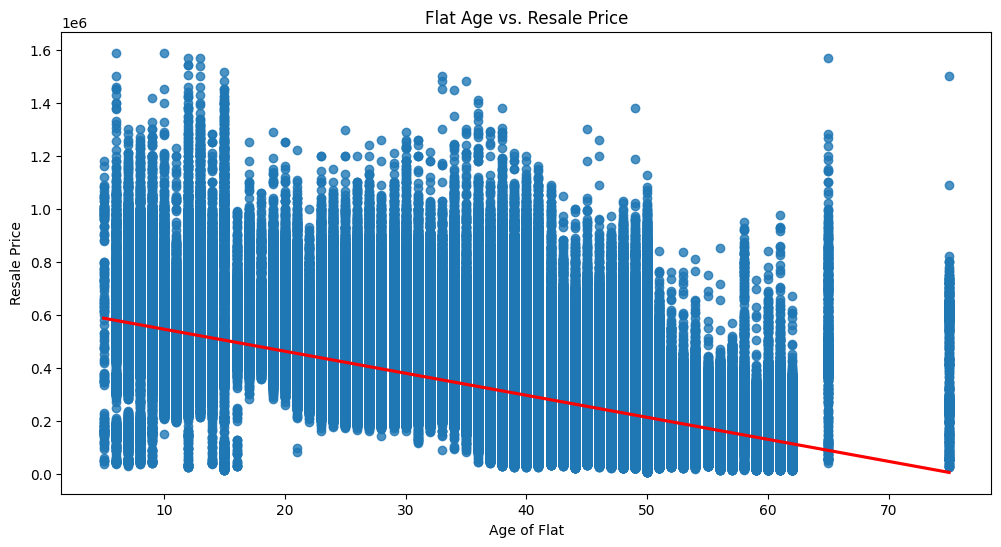

In [10]:
# Scatter Plot
plt.figure(figsize=(12, 6))

merged_data["flat_age"] = 2024 - merged_data["year_completed"]
sns.regplot(data=merged_data, x="flat_age", y="resale_price", line_kws={"color": "red"}, scatter=True)
plt.title("Flat Age vs. Resale Price")
plt.xlabel("Age of Flat")
plt.ylabel("Resale Price")
plt.show()


#### Analysis of Scatter Plot

    Due to the sheer amount of data, it is difficult to manually draw a  
    line of best fit to identify the relationship between resale price and 
    age of the flat through the use of a scatter plot. However, with code,  
    it is possible to draw an accurate line of best fit

Relationship:

    Based on the line of best fit, we identify that as the age of the flat  
    gets older, the resale price decreases. This would be mainly due to  
    Singapore's 99-year lease. HDB flats in Singapore are sold with a  
    99-year lease. As the lease period decreases, the value of the flat also  
    decreases. Buyers are often concerned about the remaining lease term as  
    shorter lease means less time to enjoy the property. This becomes more  
    obvious in the halfway mark of the lease term. As shown in the graph,  
    the first 10-20 years has more flats sold at a high resale price as  
    compared to past the 40 year mark.
    
    There are a few anomilies however, where even though the flats are old,  
    they are still sold at a high resale price. This could be due to the  
    location of the flat as flats located in prime areas or mature estates  
    with well-developed infrastructure, amenities, and transportation links  
    tend to retain higher values.


### Investment Strategies (Box Plot)

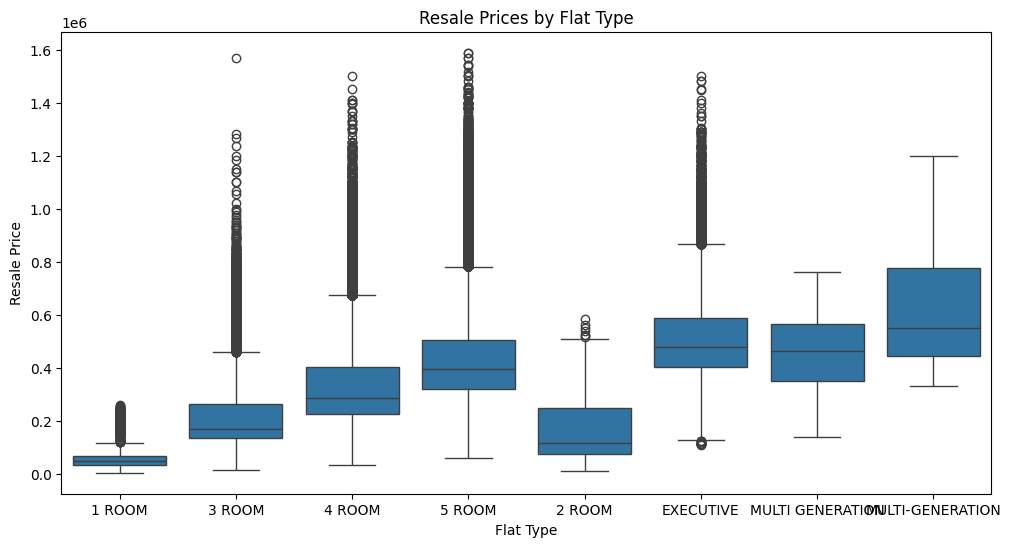

In [11]:
# Box Plot
plt.figure(figsize=(12, 6))

sns.boxplot(x="flat_type", y="resale_price", data=merged_data)
plt.title("Resale Prices by Flat Type")
plt.xlabel("Flat Type")
plt.ylabel("Resale Price")
plt.show()

#### Analysis of Box Plot

    With a box plot, we are able to see the distribution of resale prices  
    for the different flat types.

Investment Strategies:

    In the box plot, it reveals a clear upward trend in resale price as the  
    number of rooms increases. Executive and Multi-Generation flats has the  
    highest median resale prices, reflecting their larger size and possibly  
    more desirable features. The wider interquartile range (IQR) for larger  
    flat types indicate a significant variability in resale prices which  
    suggests diverse factors are influencing their market value, such as  
    location, age, and specific features. The presence of anomalies especially  
    in the 3-room to executive category, suggests that some flats in these  
    categories sell for much higher prices than the median, potentially  
    indicating a highdemand or unique features that increases their value.